# Comparison of 21gmj spectra with other LLSNe II and itself because of the LCOGT wavelength calibration issue

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import json
import glob,os
from datetime import datetime
from astropy.time import Time
#from scipy.ndimage import gaussian_filter1d
from matplotlib import cm

In [7]:
path = os.getcwd()+'/'
llpath = path+'LLSNe/'

specdf = pd.read_csv(path+'spec/specDF.csv')
lldf = pd.read_csv(llpath+'LL_expds_hand.csv')
lldf

,name,expd,expderr,type,ref,mu,z,host
0,1997D,2450367.5,40.0,s,2003MNRAS.338..711Z,30.74,0.0040,NGC 1536
1,1999br,2451277.0,4.0,n,2004MNRAS.347...74P,30.97,0.0030,NGC 4900
2,2002gd,2452553.0,4.0,s,2014ApJ...786...67A,32.87,0.0070,NGC 7537
3,2002gw,2452560.0,4.0,s,2014ApJ...786...67A,32.98,0.0100,NGC 922
4,2003B,2452617.0,11.0,s,2014ApJ...786...67A,31.11,0.0040,NGC 1097
5,2003fb,2452777.0,6.0,s,2014ApJ...786...67A,34.43,0.0170,UGC 11522
6,2003Z,2452664.0,4.5,n,2003IAUC.8062....1R,31.70,0.0060,NGC 2742
7,2004fx,2453309.5,3.0,n,2004IAUC.8431....2P,32.82,0.0090,MCG -02-14-003
8,2005cs,2453549.5,1.0,n,2017MNRAS.467..369S/2006MNRAS.370.1752P,29.46,0.0010,M51
9,2007aa,2454136.3,5.0,s,2014ApJ...786...67A,31.95,0.0050,NGC 4030


Matching 1997D...
No match found.
Matching 1999br...


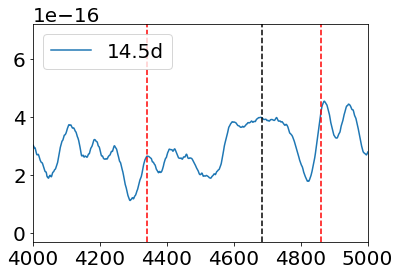

Matching 2002gd...


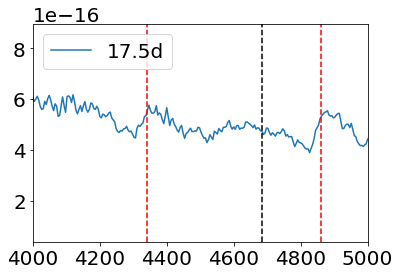

Matching 2002gw...


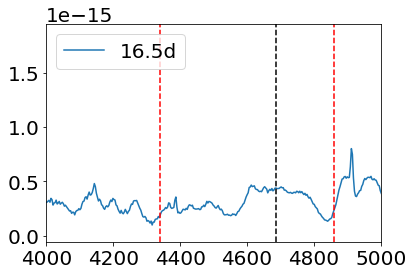

Matching 2003B...
No match found.
Matching 2003fb...
No match found.
Matching 2003Z...
No match found.
Matching 2004fx...


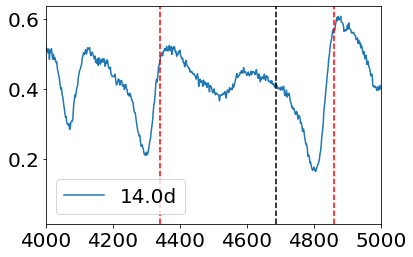

Matching 2005cs...


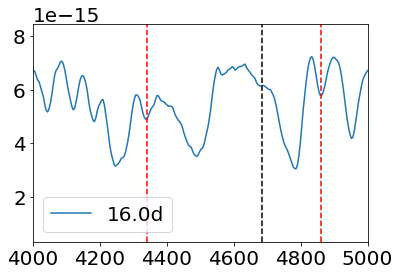

Matching 2007aa...


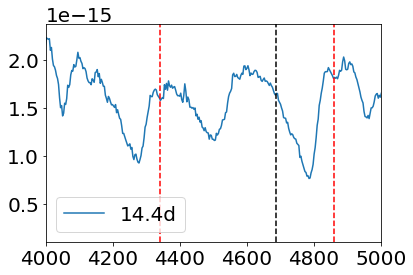

Matching 2008bk...
No match found.
Matching 2008in...


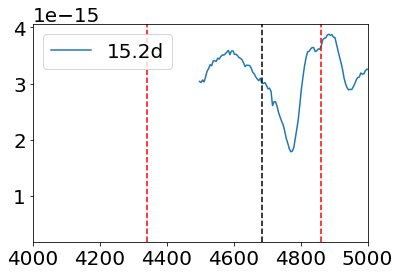

Matching 2009N...
No match found.
Matching 2010id...


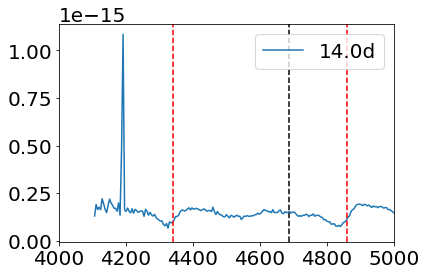

Matching 2012A...


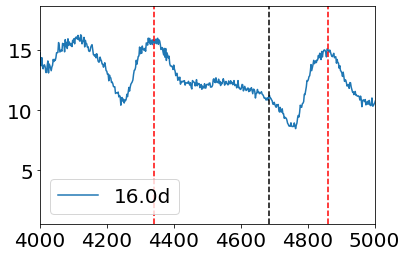

Matching 2012aw...


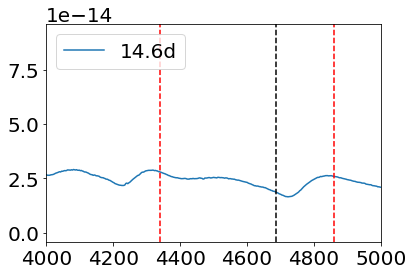

Matching 2012ec...


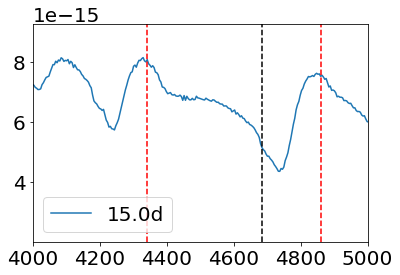

Matching 2013am...


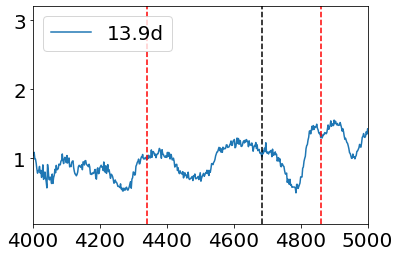

Matching 2016aqf...
No match found.
Matching 2016bkv...
No match found.


In [101]:
def getSpecMatch(row,matchPhase,matchBuffer):
    print('Matching '+row['name']+'...')
    with open(llpath+'spec/'+row['name']+'.dat','r') as f:
        data = json.load(f)
        data = data['SN'+row['name']]['spectra']
    
    # if statement is to make sure i'm only taking optical 
    phases = np.array([round(float(x[0])-(row['expd']-2400000.5),1) for x in data if(x[0] != '' and float(min(x[1][100:][0]))<6000)])
    ind = np.argmin(abs(phases-matchPhase))
    
    if abs(phases[ind]-matchPhase) <= matchBuffer:
        wave, flux = [],[]
        for x in data[ind][1:][0]:
            wave.append(float(x[0]))
            flux.append(float(x[1]))
        return [wave,flux,phases[ind]]
    else:
        return None

snMatches = []
waves = []
fluxes = []
phases = []
z = []
for ind,row in lldf.iterrows():
    #result = getSpecMatch(row,2,2)
    result = getSpecMatch(row,15,3)
    if result is not None:
        wave, flux, phase = result
        wave, flux = np.array(wave), np.array(flux)
        w = np.where(flux>0)
        plt.plot(wave[w],flux[w],label=str(phase)+'d')
        plt.legend()
        
        plt.xlim([4000,5000])
        # h gamma & beta
        hgamma = 4340
        hbeta = 4861
        plt.axvline(x=hgamma,linestyle='--',color='red')
        plt.axvline(x=hbeta,linestyle='--',color='red')
        plt.axvline(x=4686,linestyle='--',color='black')
        
        plt.show()
        
        snMatches.append(row['name'])
        waves.append(wave)
        fluxes.append(flux)
        phases.append(phase)
        z.append(row['z'])
    else:
        print('No match found.')

<ipython-input-102-83597ee21580>:21: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave[w],np.log10(flux[w])+i+scale,color='black')
<ipython-input-102-83597ee21580>:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(wave[w],np.log10(flux[w])+i+scale,color='black')
<ipython-input-102-83597ee21580>:41: RuntimeWarning: invalid value encountered in log10
  plt.plot(wave[w],np.log10(flux[w])+i+scale,color='red')


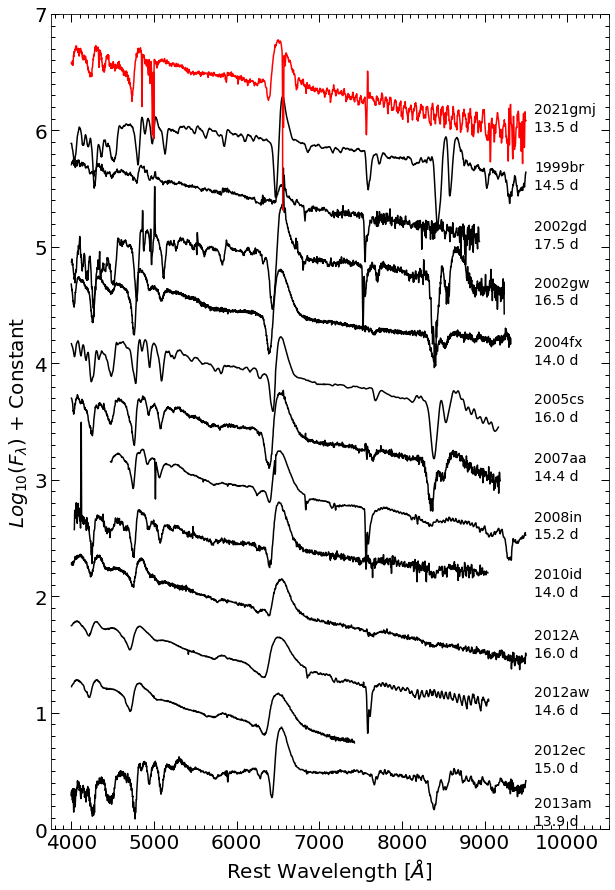

In [102]:
i = 0
scale = 8.5
plt.figure(figsize=(10,15))
matplotlib.rcParams.update({'font.size': 20})

for ind in range(len(waves)):
    wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
    wave = wave/(1.+z[ind])
    
    w = [(wave > 5500) & (wave < 6000)][0]
    integ0 = np.trapz(flux[w],wave[w])
    off = 1.5/integ0
    flux = np.array([x*off for x in flux])
     
    #fluxSmooth = np.array(gaussian_filter1d(flux, 3))
    #plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')
    
    w = [(wave>4000)&(wave<9500)][0]
    q = [(wave>6000)&(wave<6100)][0]
    yText = np.mean(np.log10(flux[q]))
    plt.plot(wave[w],np.log10(flux[w])+i+scale,color='black')
    plt.text(9600,yText+i+scale-0.3,snMatches[ind],fontsize=14)
    plt.text(9600,yText+i+scale-0.45,str(round(phases[ind],1))+' d',fontsize=14)
    i -= 0.5

# plot 21gmj in red above the rest
wave, flux = np.loadtxt(path+'spec/2021gmj_LCO_13.5.dat',unpack=True)[:2]
wave = wave/(1.+0.003)
w = [(wave > 5500) & (wave < 6000)][0]
integ0 = np.trapz(flux[w],wave[w])
off = 1.5/integ0
flux = np.array([x*off for x in flux])

#fluxSmooth = np.array(gaussian_filter1d(flux, 3))
#plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')

w = [(wave>4000)&(wave<9500)][0]
i = 0.5
q = [(wave>6000)&(wave<6100)][0]
yText = np.mean(np.log10(flux[q]))
plt.plot(wave[w],np.log10(flux[w])+i+scale,color='red')
plt.text(9600,yText+i+scale-0.3,'2021gmj',fontsize=14)
plt.text(9600,yText+i+scale-0.45,'13.5 d',fontsize=14)

plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength [$\AA$]')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,10.00,1.0))
plt.gca().set_yticks(np.arange(0.0,10.00,0.1), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(3000,11000,1000))
plt.gca().set_xticks(np.arange(3000,11000,100), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plt.xlim([3750,10500])
plt.ylim([0,7])
plt.savefig(path+'figures/spec_compare_15.png',format='png',dpi=300)
plt.show()

In [103]:
'''def getSpecMatch(row,matchPhase,matchBuffer):
    print('Matching '+row['name']+'...')
    with open(llpath+'spec/'+row['name']+'.dat','r') as f:
        data = json.load(f)
        data = data['SN'+row['name']]['spectra']
    
    # if statement is to make sure i'm only taking optical 
    phases = np.array([round(float(x[0])-(row['expd']-2400000.5),1) for x in data if(x[0] != '' and float(min(x[1][100:][0]))<6000)])
    ind = np.argmin(abs(phases-matchPhase))
    
    if abs(phases[ind]-matchPhase) <= matchBuffer:
        wave, flux = [],[]
        for x in data[ind][1:][0]:
            wave.append(float(x[0]))
            flux.append(float(x[1]))
        return [wave,flux,phases[ind]]
    else:
        return None
'''
snMatches = []
waves = []
fluxes = []
phases = []
z = []
for ind,row in lldf.iterrows():
    result = getSpecMatch(row,50,5)
    #result = getSpecMatch(row,15,3)
    if result is not None:
        wave, flux, phase = result
        wave, flux = np.array(wave), np.array(flux)
        '''w = np.where(flux>0)
        plt.plot(wave[w],flux[w],label=str(phase)+'d')
        plt.legend()
        
        plt.xlim([4000,5000])
        # h gamma & beta
        hgamma = 4340
        hbeta = 4861
        plt.axvline(x=hgamma,linestyle='--',color='red')
        plt.axvline(x=hbeta,linestyle='--',color='red')
        plt.axvline(x=4686,linestyle='--',color='black')
        
        plt.show()'''
        
        snMatches.append(row['name'])
        waves.append(wave)
        fluxes.append(flux)
        phases.append(phase)
        z.append(row['z'])
    else:
        print('No match found.')

Matching 1997D...
No match found.
Matching 1999br...
No match found.
Matching 2002gd...
Matching 2002gw...
No match found.
Matching 2003B...
No match found.
Matching 2003fb...
No match found.
Matching 2003Z...
No match found.
Matching 2004fx...
Matching 2005cs...
No match found.
Matching 2007aa...
Matching 2008bk...
Matching 2008in...
Matching 2009N...
Matching 2010id...
Matching 2012A...
Matching 2012aw...
Matching 2012ec...
Matching 2013am...
No match found.
Matching 2016aqf...
No match found.
Matching 2016bkv...
No match found.


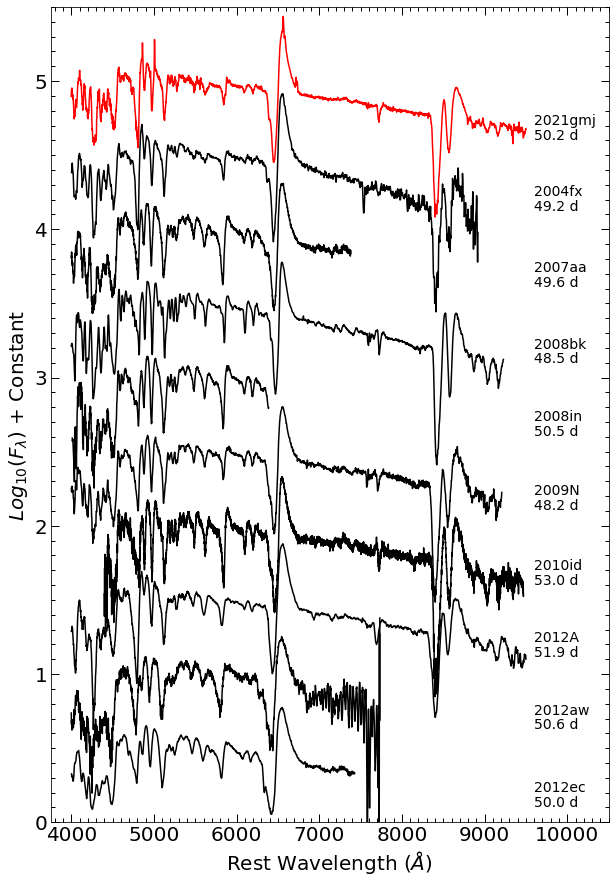

In [114]:
i = 0
scale = 7.
plt.figure(figsize=(10,15))
matplotlib.rcParams.update({'font.size': 20})

for ind in range(len(waves)):
    if snMatches[ind] != '2002gd': # i don't trust the 2002gd pahse
        wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
        wave = wave/(1.+z[ind])

        w = [(wave > 5500) & (wave < 6000)][0]
        integ0 = np.trapz(flux[w],wave[w])
        off = 1.5/integ0
        flux = np.array([x*off for x in flux])

        #fluxSmooth = np.array(gaussian_filter1d(flux, 3))
        #plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')

        w = [(wave>4000)&(wave<9500)][0]
        q = [(wave>6000)&(wave<6100)][0]
        yText = np.mean(np.log10(flux[q]))
        plt.plot(wave[w],np.log10(flux[w])+i+scale,color='black')
        plt.text(9600,yText+i+scale-0.25,snMatches[ind],fontsize=14)
        plt.text(9600,yText+i+scale-0.35,str(round(phases[ind],1))+' d',fontsize=14)
        i -= 0.5

# plot 21gmj in red above the rest
wave, flux = np.loadtxt(path+'spec/sn2021gmj-20210509.322.coadd.blotch-ui.flm',unpack=True)[:2]
wave = wave/(1.+0.003)
w = [(wave > 5100) & (wave < 6000)][0]
integ0 = np.trapz(flux[w],wave[w])
off = 1.5/integ0
flux = np.array([x*off for x in flux])

#fluxSmooth = np.array(gaussian_filter1d(flux, 3))
#plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')

w = [(wave>4000)&(wave<9500)][0]
i = 0.75
q = [(wave>6000)&(wave<6100)][0]
yText = np.mean(np.log10(flux[q]))
plt.plot(wave[w],np.log10(flux[w])+i+scale,color='red')
plt.text(9600,yText+i+scale-0.25,'2021gmj',fontsize=14)
plt.text(9600,yText+i+scale-0.35,'50.2 d',fontsize=14)

plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
plt.xlabel(r'Rest Wavelength ($\AA$)')#,fontsize=18)

plt.gca().tick_params(direction='in', length=8, width=1, which='major')
plt.gca().tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
plt.gca().set_yticks(np.arange(0.0,10.00,1.0))
plt.gca().set_yticks(np.arange(0.0,10.00,0.1), minor=True)
plt.gca().yaxis.set_ticks_position('both')
# x ticks
plt.gca().set_xticks(np.arange(3000,11000,1000))
plt.gca().set_xticks(np.arange(3000,11000,100), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plt.xlim([3750,10500])
plt.ylim([0,5.5])
plt.savefig(path+'figures/spec_compare_50.png',format='png',dpi=300)
plt.show()

In [105]:
# input parameters
gmj = {'name': '2021gmj'}
gmj['z'] = 0.003
gmj['file'] = glob.glob(path+'spec/2021gmj*.dat')
gmj['phase'] = [float(x.split('_')[-1][:-4]) for x in gmj['file']]

# 2013fs
fs = {'name': '2013fs'}
fs['z'] = 0.012
fs['file'] = glob.glob(path+'2013fs/*')
fs['expd'] = Time('2013-10-06', scale='utc').jd + 0.245
dates = [x.split('_')[1:3] for x in fs['file']]
dates = ['T'.join([x[0],':'.join(x[1].split('-'))]) for x in dates]
fs['date'] = dates
fs['phase'] = [round(Time(x, scale='utc').jd-fs['expd'],1) for x in fs['date']]

# 2006bp
bp = {'name': '2006bp'}
bp['z'] = 0.0035
bp['file'] = glob.glob(path+'2006bp/*')
bp['phase'] = [float(x.split('_')[-1][:-4]) for x in bp['file']]

# 2017gmr
gmr = {'name': '2017gmr'}
gmr['z'] = 0.005
gmr['expd'] = 57999.09
gmr['file'] = glob.glob(path+'2017gmr/*sca.dat')
gmr['phase'] = [round(float(x.split('MJD')[-1].split('_')[0])-gmr['expd'],1) for x in gmr['file']]
#print(gmr)


combPhase = [x for x in gmj['phase']]
combFile = [x for x in gmj['file']]
for i in range(len(fs['phase'])):
    combPhase.append(fs['phase'][i])
    combFile.append(fs['file'][i])
for i in range(len(bp['phase'])):
    combPhase.append(bp['phase'][i])
    combFile.append(bp['file'][i])
for i in range(len(gmr['phase'])):
    combPhase.append(gmr['phase'][i])
    combFile.append(gmr['file'][i])
w = np.argsort(combPhase)
combPhase = np.array(combPhase)[w]
combFile = np.array(combFile)[w]

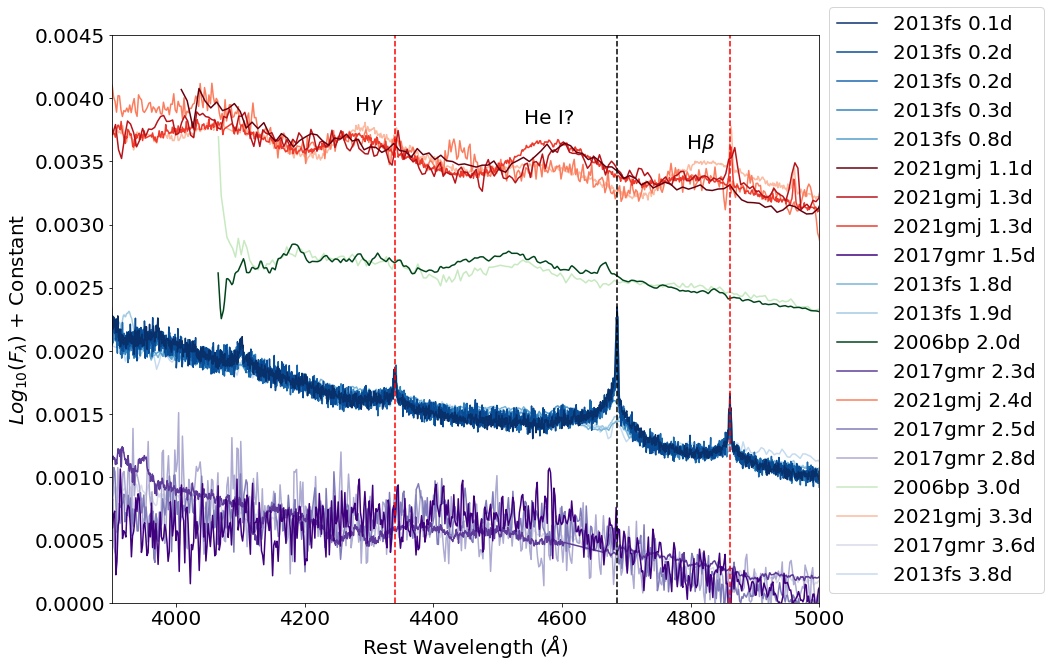

In [113]:
def plotFlash():
    HeI = 4686
    plt.axvline(x=HeI,linestyle='--',color='black')
    
    # h gamma & beta
    hgamma = 4340
    hbeta = 4861
    plt.axvline(x=hgamma,linestyle='--',color='red')
    plt.axvline(x=hbeta,linestyle='--',color='red')
    #plt.text(flash2,0.05,r'HeII',color='black',horizontalalignment='right')
    
    #plt.text(hgamma,0.05,r'H$\gamma$',color='red',horizontalalignment='right')
    #plt.text(hbeta,0.05,r'H$\beta$',color='red',horizontalalignment='left')
    return

def plotLabels():
    plt.text(4580,0.0038,r'He I?',horizontalalignment='center')
    #plt.plot([4580,4580],[0.0027,0.00285],color='black')
    
    # add hbeta and hgamma labels
    plt.text(4816,0.0036,r'H$\beta$',horizontalalignment='center')
    plt.text(4300,0.0039,r'H$\gamma$',horizontalalignment='center')
        
    return

i = 0
scale = 0.0
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 20})

# creating color map
start = 0.25
stop = 1.0
upperPhase = 5

number_of_lines= len(np.where(np.array(gmj['phase'])<upperPhase)[0])
cm_subsection = np.linspace(start, stop, number_of_lines)
redColors = [cm.Reds(x) for x in cm_subsection]

number_of_lines= len(np.where(np.array(fs['phase'])<upperPhase)[0])
cm_subsection = np.linspace(start, stop, number_of_lines)
blueColors = [cm.Blues(x) for x in cm_subsection]

number_of_lines= len(np.where(np.array(bp['phase'])<upperPhase)[0])
cm_subsection = np.linspace(start, stop, number_of_lines)
greenColors = [cm.Greens(x) for x in cm_subsection]

number_of_lines= len(np.where(np.array(gmr['phase'])<upperPhase)[0])
cm_subsection = np.linspace(start, stop, number_of_lines)
purpleColors = [cm.Purples(x) for x in cm_subsection]

counterDict = {'red': 0, 'blue': 0, 'green': 0, 'purple': 0}

for ind in np.argsort(combPhase)[::-1]:
    if combPhase[ind] in fs['phase'] and combPhase[ind] < upperPhase:
        dic = fs
        color = blueColors[counterDict['blue']]
        counterDict['blue'] += 1
        i = 0
    elif combPhase[ind] in bp['phase'] and combPhase[ind] < upperPhase:
        dic = bp
        color = greenColors[counterDict['green']]
        counterDict['green'] += 1
        i = 0.001
    elif combPhase[ind] in gmr['phase'] and combPhase[ind] < upperPhase:
        dic = gmr
        color = purpleColors[counterDict['purple']]
        counterDict['purple'] += 1
        i = -0.001
    elif combPhase[ind] in gmj['phase'] and combPhase[ind] < upperPhase:
        dic = gmj
        color = redColors[counterDict['red']]
        counterDict['red'] += 1
        i = 0.002
    if combPhase[ind] < upperPhase:
        wave,flux = np.loadtxt(combFile[ind],unpack=True)[:2]
        wave = wave/(1.+dic['z'])

        w = [(wave > 4000) & (wave < 5000)][0]
        integ0 = np.trapz(flux[w],wave[w])
        off = 1.5/integ0
        flux = np.array([x*off for x in flux])

        plt.plot(wave,flux+scale+i,color=color,label=dic['name']+' '+str(combPhase[ind])+'d')
        w = [(wave > 4000) & (wave < 4100)][0]
    
plotFlash()
plotLabels()

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0), loc='lower left', ncol=1)
plt.xlim([3900.,5000.])
plt.ylim([0.,0.0045])

plt.xlabel(r'Rest Wavelength ($\AA$)')
plt.ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')
plt.tight_layout()
plt.savefig(path+'figures/spec_compare_HeI.png',format='png',dpi=300)
plt.show()

<ipython-input-107-37790b50c277>:25: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:25: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:25: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:25: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:25: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:31: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:31: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790b50c277>:31: RuntimeWarning: invalid value encountered in log10
  flux = np.log10(np.array(flux))
<ipython-input-107-37790

5750.353580644755
5775.926839500322
5762.006203922062
5750.014209255162


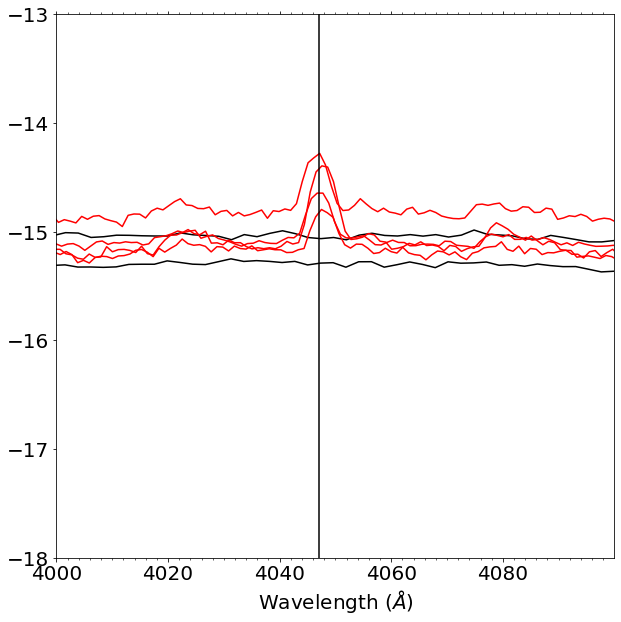

In [107]:
from astropy.io import fits

z = 0.0033
def readFits(file):
    f = fits.open(file)
    crval1 = f[0].header['CRVAL1']
    cdel1 = f[0].header['CD1_1']
    crpix1 = f[0].header['CRPIX1']
    firstpix = crval1-cdel1*(crpix1-1)
    wave = [cdel1*i+firstpix for i in range(len(f[0].data[0][0]))]   
    flux = f[0].data[2][0]
    
    return [wave,flux]

# look at the sky lines 
bfiles = glob.glob('/Users/sfdavis/Downloads/cd*fits')
lfiles = glob.glob('/Users/sfdavis/projects/SN2021gmj/spec/*redblu*fits')


plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 20})

for file in lfiles:
    wave, flux = readFits(file)
    flux = np.log10(np.array(flux))
    plt.plot(np.array(wave),flux,color='black')
    
for file in bfiles:
    wave, flux = readFits(file)
    print(max(wave))
    flux = np.log10(np.array(flux))
    plt.plot(np.array(wave),flux,color='red')

# x ticks
xmin, xmax = 4000,4100
plt.gca().set_xticks(np.arange(xmin,xmax,20))
plt.gca().set_xticks(np.arange(xmin,xmax,2), minor=True)
plt.gca().xaxis.set_ticks_position('both')

plt.axvline(x=4047,color='black')
#plt.axvline(x=4368,color='green')
#plt.axvline(x=4871,color='black')
#plt.axvline(x=4878,color='red')
#plt.axvline(x=4348,color='black')
#plt.axvline(x=4359,color='red')
#plt.axvline(x=4340,color='green')

plt.xlim([xmin,xmax])
plt.ylim([-18,-13])

#plt.legend()
plt.xlabel(r'Wavelength ($\AA$)')
plt.show()

Matching 1997D...
No match found.
Matching 1999br...
Matching 2002gd...
Matching 2002gw...
Matching 2003B...
No match found.
Matching 2003fb...
No match found.
Matching 2003Z...
No match found.
Matching 2004fx...
Matching 2005cs...
Matching 2007aa...
Matching 2008bk...
No match found.
Matching 2008in...
Matching 2009N...
No match found.
Matching 2010id...
Matching 2012A...
Matching 2012aw...
Matching 2012ec...
Matching 2013am...
Matching 2016aqf...
No match found.
Matching 2016bkv...
No match found.


<ipython-input-115-717f9d25b8b7>:41: RuntimeWarning: invalid value encountered in log10
  axs[0].plot(wave[w],np.log10(flux[w])+i+scale,color='black')
<ipython-input-115-717f9d25b8b7>:41: RuntimeWarning: divide by zero encountered in log10
  axs[0].plot(wave[w],np.log10(flux[w])+i+scale,color='black')


Matching 1997D...
No match found.
Matching 1999br...
No match found.
Matching 2002gd...
Matching 2002gw...
No match found.
Matching 2003B...
No match found.
Matching 2003fb...
No match found.
Matching 2003Z...
No match found.
Matching 2004fx...
Matching 2005cs...
No match found.
Matching 2007aa...
Matching 2008bk...
Matching 2008in...
Matching 2009N...
Matching 2010id...
Matching 2012A...
Matching 2012aw...
Matching 2012ec...
Matching 2013am...
No match found.
Matching 2016aqf...
No match found.
Matching 2016bkv...
No match found.


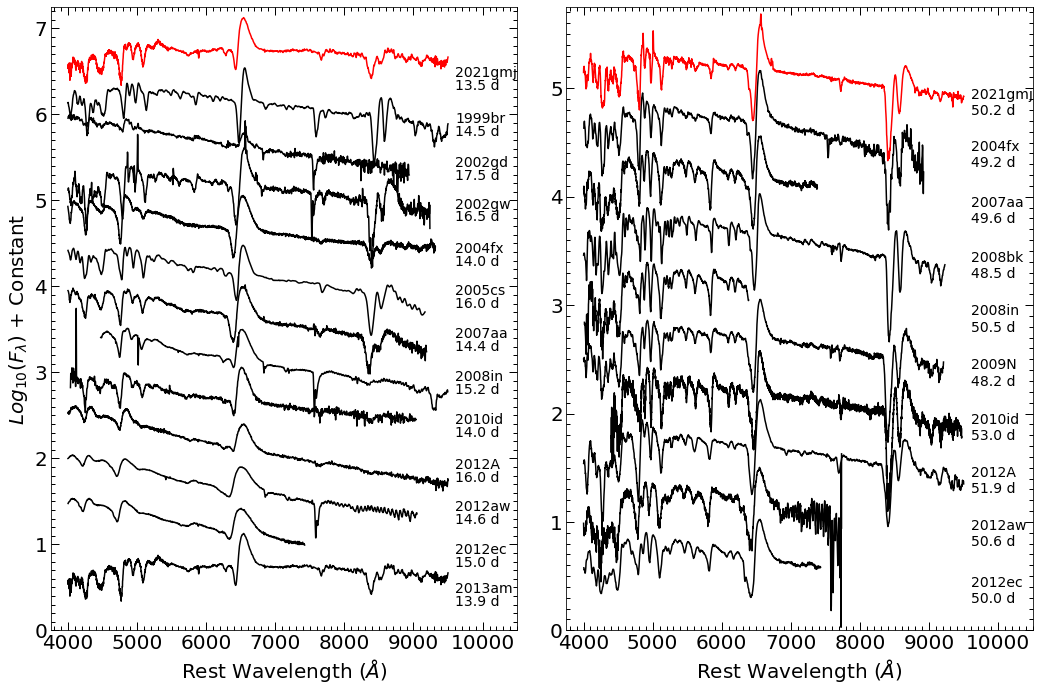

In [115]:
i = 0
scale = 8.75
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
matplotlib.rcParams.update({'font.size': 20})

##### 15 day
snMatches = []
waves = []
fluxes = []
phases = []
z = []
for ind,row in lldf.iterrows():
    #result = getSpecMatch(row,50,5)
    result = getSpecMatch(row,15,3)
    if result is not None:
        wave, flux, phase = result
        wave, flux = np.array(wave), np.array(flux)
        
        snMatches.append(row['name'])
        waves.append(wave)
        fluxes.append(flux)
        phases.append(phase)
        z.append(row['z'])
    else:
        print('No match found.')
for ind in range(len(waves)):
    wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
    wave = wave/(1.+z[ind])
    
    w = [(wave > 5500) & (wave < 6000)][0]
    integ0 = np.trapz(flux[w],wave[w])
    off = 1.5/integ0
    flux = np.array([x*off for x in flux])
     
    #fluxSmooth = np.array(gaussian_filter1d(flux, 3))
    #plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')
    
    w = [(wave>4000)&(wave<9500)][0]
    q = [(wave>6000)&(wave<6100)][0]
    yText = np.mean(np.log10(flux[q]))
    axs[0].plot(wave[w],np.log10(flux[w])+i+scale,color='black')
    axs[0].text(9600,yText+i+scale-0.3,snMatches[ind],fontsize=14)
    axs[0].text(9600,yText+i+scale-0.45,str(round(phases[ind],1))+' d',fontsize=14)
    i -= 0.5

w = [(wave>4000)&(wave<9500)][0]
i = 0.5
q = [(wave>6000)&(wave<6100)][0]
yText = np.mean(np.log10(flux[q]))
axs[0].plot(wave[w],np.log10(flux[w])+i+scale,color='red')
axs[0].text(9600,yText+i+scale-0.3,'2021gmj',fontsize=14)
axs[0].text(9600,yText+i+scale-0.45,'13.5 d',fontsize=14)

axs[0].set_ylabel(r'$Log_{10}(F_{\lambda})$ + Constant')#,fontsize=18)
axs[0].set_xlabel(r'Rest Wavelength ($\AA$)')#,fontsize=18)

axs[0].tick_params(direction='in', length=8, width=1, which='major')
axs[0].tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
axs[0].set_yticks(np.arange(0.0,10.00,1.0))
axs[0].set_yticks(np.arange(0.0,10.00,0.1), minor=True)
axs[0].yaxis.set_ticks_position('both')
# x ticks
axs[0].set_xticks(np.arange(3000,11000,1000))
axs[0].set_xticks(np.arange(3000,11000,100), minor=True)
axs[0].xaxis.set_ticks_position('both')

axs[0].set_xlim([3750,10500])
axs[0].set_ylim([0,7.25])

#### 50 day
i = 0
scale = 7.25
snMatches = []
waves = []
fluxes = []
phases = []
z = []
for ind,row in lldf.iterrows():
    result = getSpecMatch(row,50,5)
    #result = getSpecMatch(row,15,3)
    if result is not None:
        wave, flux, phase = result
        wave, flux = np.array(wave), np.array(flux)
        
        snMatches.append(row['name'])
        waves.append(wave)
        fluxes.append(flux)
        phases.append(phase)
        z.append(row['z'])
    else:
        print('No match found.')
for ind in range(len(waves)):
    if snMatches[ind] != '2002gd': # i don't trust the 2002gd pahse
        wave, flux = np.array(waves[ind]), np.array(fluxes[ind])
        wave = wave/(1.+z[ind])

        w = [(wave > 5500) & (wave < 6000)][0]
        integ0 = np.trapz(flux[w],wave[w])
        off = 1.5/integ0
        flux = np.array([x*off for x in flux])

        #fluxSmooth = np.array(gaussian_filter1d(flux, 3))
        #plt.plot(wave,np.log10(fluxSmooth)+i+scale,color='black')

        w = [(wave>4000)&(wave<9500)][0]
        q = [(wave>6000)&(wave<6100)][0]
        yText = np.mean(np.log10(flux[q]))
        axs[1].plot(wave[w],np.log10(flux[w])+i+scale,color='black')
        axs[1].text(9600,yText+i+scale-0.3,snMatches[ind],fontsize=14)
        axs[1].text(9600,yText+i+scale-0.45,str(round(phases[ind],1))+' d',fontsize=14)
        i -= 0.5

# plot 21gmj in red above the rest
wave, flux = np.loadtxt(path+'spec/sn2021gmj-20210509.322.coadd.blotch-ui.flm',unpack=True)[:2]
wave = wave/(1.+0.003)
w = [(wave > 5100) & (wave < 6000)][0]
integ0 = np.trapz(flux[w],wave[w])
off = 1.5/integ0
flux = np.array([x*off for x in flux])
w = [(wave>4000)&(wave<9500)][0]
i = 0.75
q = [(wave>6000)&(wave<6100)][0]
yText = np.mean(np.log10(flux[q]))
axs[1].plot(wave[w],np.log10(flux[w])+i+scale,color='red')
axs[1].text(9600,yText+i+scale-0.3,'2021gmj',fontsize=14)
axs[1].text(9600,yText+i+scale-0.45,'50.2 d',fontsize=14)

axs[1].set_xlabel(r'Rest Wavelength ($\AA$)')#,fontsize=18)

axs[1].tick_params(direction='in', length=8, width=1, which='major')
axs[1].tick_params(direction='in', length=4, width=1, which='minor')
# y ticks
axs[1].set_yticks(np.arange(0.0,10.00,1.0))
axs[1].set_yticks(np.arange(0.0,10.00,0.1), minor=True)
axs[1].yaxis.set_ticks_position('both')
#axs[1].yaxis.set_label_position("right")
#axs[1].yaxis.tick_right()
# x ticks
axs[1].set_xticks(np.arange(3000,11000,1000))
axs[1].set_xticks(np.arange(3000,11000,100), minor=True)
axs[1].xaxis.set_ticks_position('both')

axs[1].set_xlim([3750,10500])
axs[1].set_ylim([0,5.75])

plt.tight_layout()
plt.savefig(path+'figures/spec_compare_comb.png',format='png',dpi=300)